In [1]:
import torch
import torchvision
import torch.nn.functional as F

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [29]:
##modifiy
path = "C:/Users/liFangzheng/Desktop/LI_development/new/leo-1/7/"

In [30]:

#labels_path_2 ='C:/Users/liFangzheng/Desktop/Fangzheng_lipeiyue/labels/idx_to_labels.npy'
#pth_path_2 = 'C:/Users/liFangzheng/Desktop/Fangzheng_lipeiyue/save/best-0.983.pth'

labels_path_2 ='C:/Users/liFangzheng/Desktop/LI peiyue/labels/idx_to_labels.npy'
pth_path_2 = 'C:/Users/liFangzheng/Desktop/LI peiyue/save/best-0.964.pth'

In [31]:

folder_path = path+'output'
time = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if filename.endswith(".png"):
      image = Image.open(file_path)
      image_name = os.path.splitext(filename)[0]
      time.append(image_name)
      image.close()

In [32]:
df_timeline = pd.DataFrame({"time": time})
df_timeline[0]=''
df_timeline[1]=''
df_timeline[2]=''
df_timeline[3]=''
df_timeline[4]=''
df_timeline[5]=''
#df_timeline[6]=''
df_timeline

,time,0,1,2,3,4,5
0,150,,,,,,
1,155,,,,,,
2,160,,,,,,
3,165,,,,,,
4,170,,,,,,
5,175,,,,,,
6,180,,,,,,
7,185,,,,,,
8,190,,,,,,
9,195,,,,,,


In [33]:
from torchvision import models

idx_to_labels_2 = np.load(labels_path_2, allow_pickle=True).item()
idx_to_labels_2

{'1.5fold': 0,
 '2fold': 1,
 'dorsal intercalation': 2,
 'gastrulation': 3,
 'rotation': 4,
 'ventral enclosure': 5}

In [34]:
model = torch.load(pth_path_2)
model = model.eval().to(device)

from torchvision import transforms
test_transform = transforms.Compose([
                                     transforms.Grayscale(1),
                                    transforms.ToTensor(),
])
#transforms.Resize((224, 224)),
n = 6

for filename in os.listdir(folder_path):
  file_path = os.path.join(folder_path, filename)
  if filename.endswith(".png"):
    image = Image.open(file_path)
    image_name = os.path.splitext(filename)[0]
    print(image_name)
    input_img = test_transform(image)
    input_img = input_img.unsqueeze(0).to(device)
    pred_logits = model(input_img)
    pred_softmax = F.softmax(pred_logits, dim=1)
    top_n = torch.topk(pred_softmax, n)
    pred_ids = top_n[1].cpu().detach().numpy().squeeze()
    confs = top_n[0].cpu().detach().numpy().squeeze()
    for i in range(n):
      class_name = pred_ids[i]
      confidence = confs[i] * 100
      df_timeline.loc[df_timeline['time'] == image_name, class_name ] = confidence

150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415


In [35]:
df_timeline

,time,0,1,2,3,4,5
0,150,0.006105,0.008221,0.335255,99.649835,0.0003,0.000283
1,155,0.0138,0.142765,11.238265,88.569438,0.005634,0.030092
2,160,0.000497,0.0004,0.139499,99.858749,0.000669,0.000185
3,165,0.012275,0.022424,14.335893,85.575855,0.012592,0.040967
4,170,0.006167,0.005773,4.460527,95.459002,0.013165,0.055375
5,175,0.018997,0.006984,2.382068,97.538084,0.020409,0.03346
6,180,0.000439,0.000762,0.022765,99.972695,0.001693,0.00164
7,185,0.000476,0.001714,0.012747,99.984276,0.000453,0.000336
8,190,0.001093,0.001102,0.150685,99.833542,0.008838,0.004738
9,195,0.022098,0.008777,10.934923,89.008862,0.02132,0.004024


In [36]:
df_timeline['time'] = df_timeline['time'].astype(int)

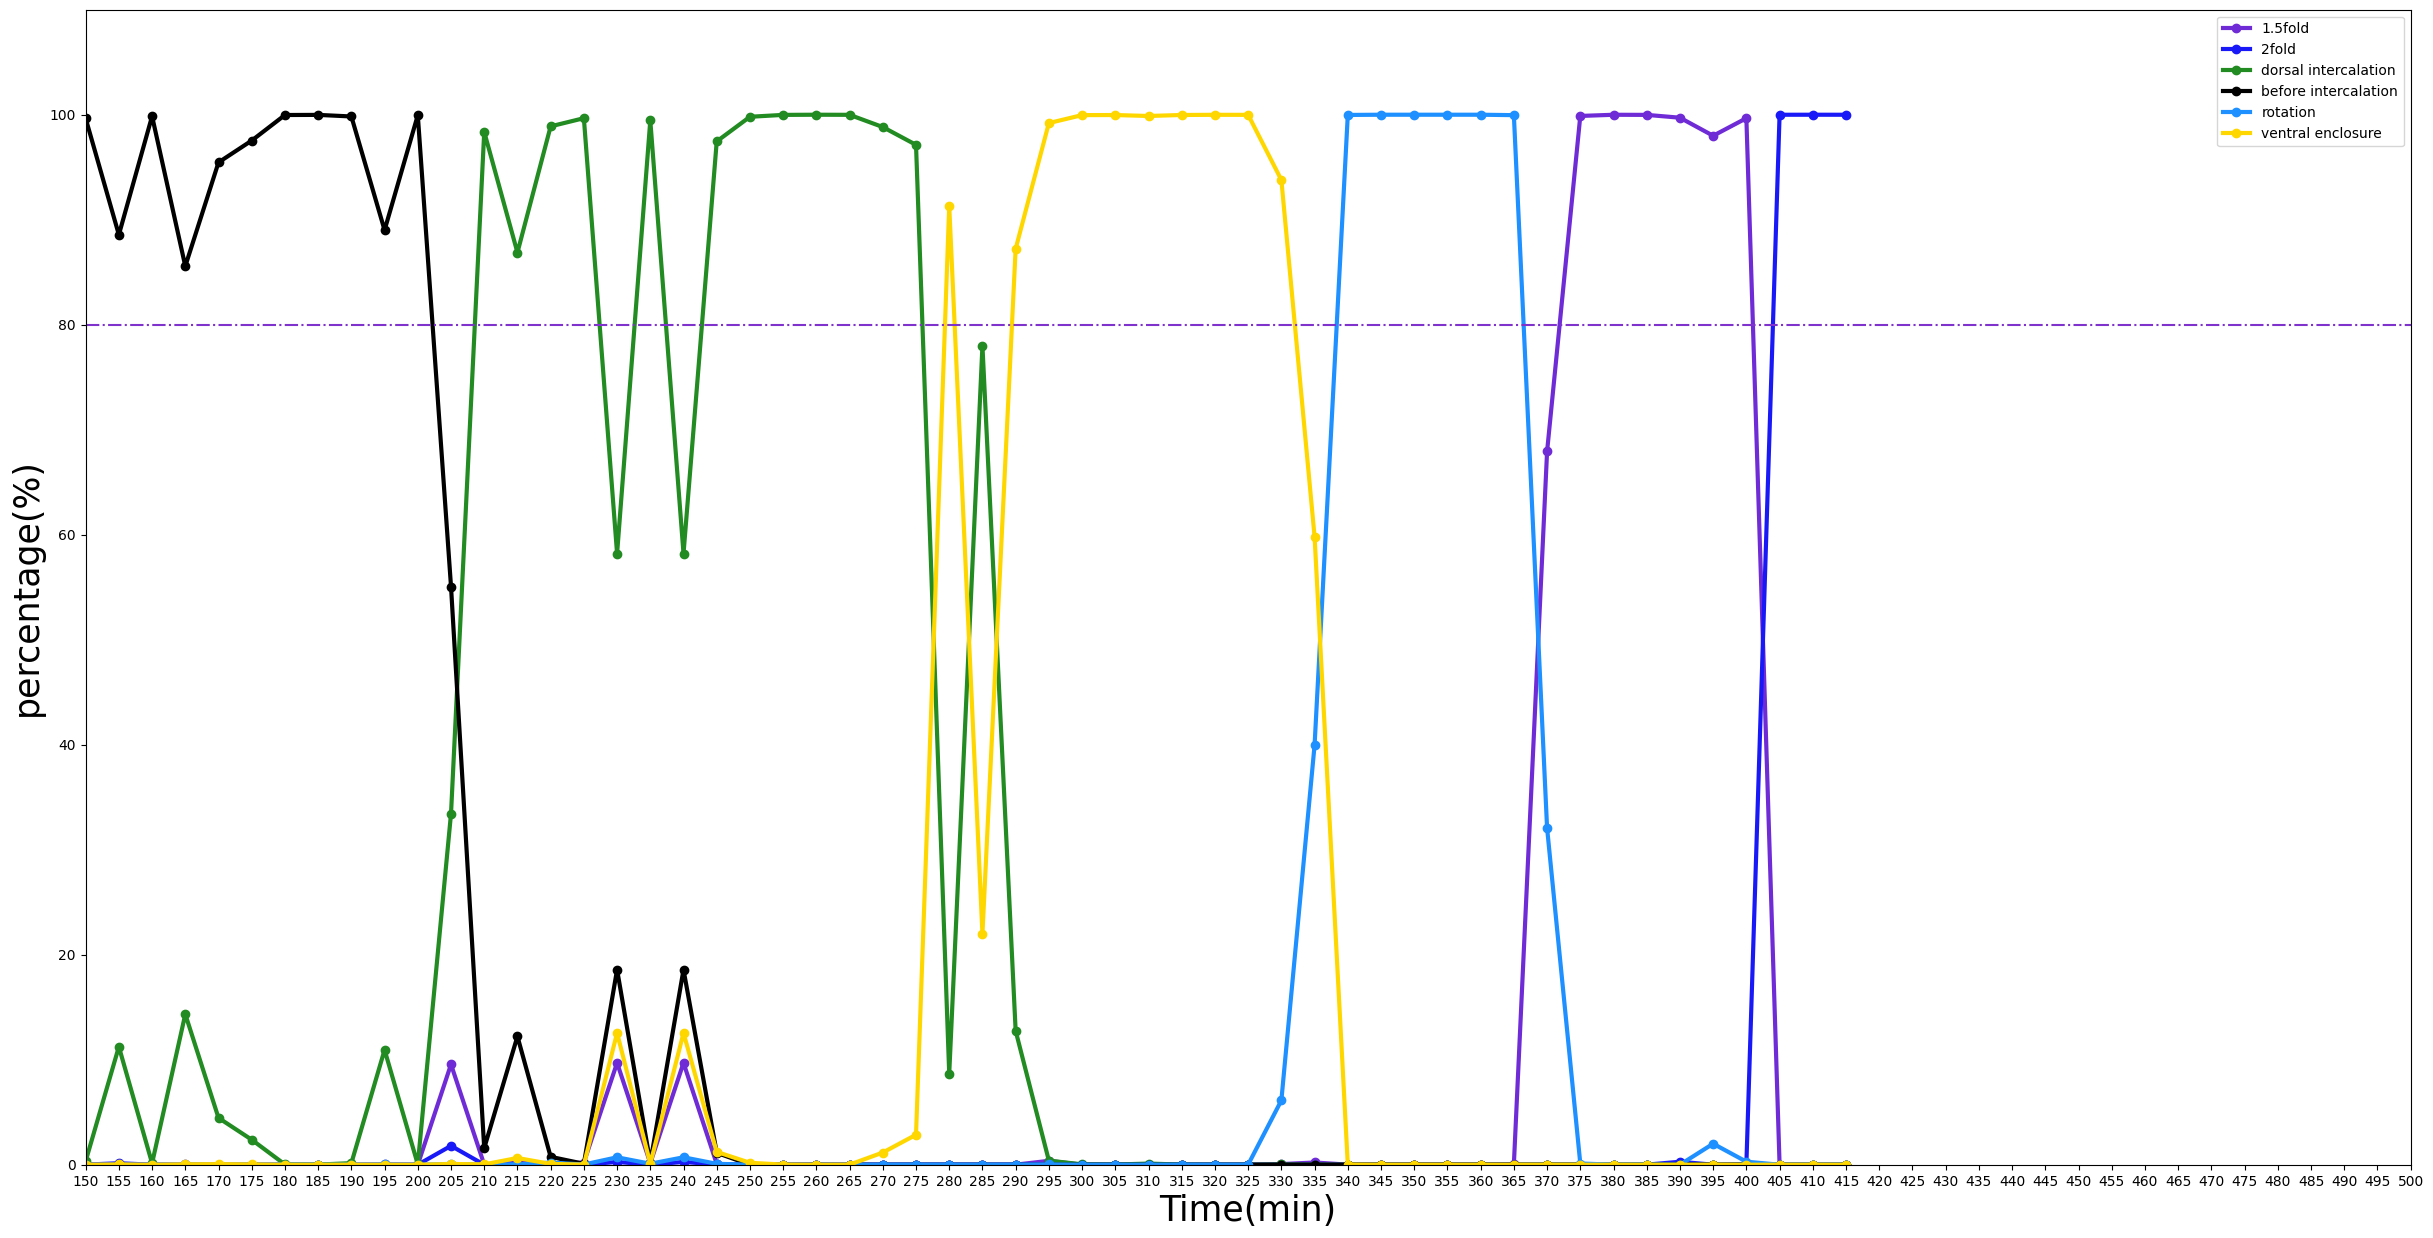

over


In [37]:
plt.figure(figsize=(30, 15))
#x = df_timeline['time']
plt.ylim(0, 110)
#plt.xlim(200, 600)
#plt.xlim(230, 600)
plt.plot(df_timeline['time'], df_timeline[0],marker='o', linewidth=3, c='#6F2BD5',label="1.5fold")
plt.plot(df_timeline['time'], df_timeline[1],marker='o', linewidth=3, c='#1919F8',label="2fold")
#plt.plot(df_timeline['time'], df_timeline[2],marker='o', linewidth=3, c='#FF0000',label="abnormal")
plt.plot(df_timeline['time'], df_timeline[2],marker='o', linewidth=3, c='#228B22',label="dorsal intercalation")
plt.plot(df_timeline['time'], df_timeline[3],marker='o', linewidth=3, c='#000000',label="before intercalation")
plt.plot(df_timeline['time'], df_timeline[4],marker='o', linewidth=3, c='#1E90FF',label="rotation")
plt.plot(df_timeline['time'], df_timeline[5],marker='o', linewidth=3, c='#FFD700',label="ventral enclosure")

plt.legend(loc='best')
plt.xlabel("Time(min)", fontdict={'size': 25})
plt.ylabel("percentage(%)", fontdict={'size': 25})
plt.xlim(150, 500)
plt.xticks(range(150, 501, 5))
plt.axhline(y=80, color=(0.5, 0.2, 0.8), linestyle='-.')
plt.savefig(path+'data/Timeline.jpg')

plt.show()

df_timeline.to_csv(path+'data/time_data.csv')
print("over")

